In [26]:
pip install statsmodels --upgrade


In [29]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
color = sns.color_palette()
import statsmodels.api as sm
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np


<ipython-input-29-4aea68dc65bb>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [6]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')


In [9]:

data = pd.read_csv("https://raw.githubusercontent.com/sarangkartikey50/stock-prediction-time-series-analysis/master/dataset.csv")


In [10]:
data['Total_Price'] = data['Quantity']*data['UnitPrice']



In [11]:
data = data[data.Quantity > 0]
data = data[data.UnitPrice > 0]
data = data[data.iloc[:, :] != '']


In [12]:
data['date'] = data['InvoiceDate'].map(lambda x: str(x)[:7])


In [13]:
Quantity_date=data[['date', 'Quantity']].drop_duplicates()
Quantity_date_count=Quantity_date.groupby(['date'])['Quantity'].aggregate('sum').reset_index().sort_values(by='date', ascending=0)

In [14]:
date=list(Quantity_date_count['date'])
quantity=list(Quantity_date_count['Quantity'])
date_quantity = pd.DataFrame({'dates': date, 'quantity':quantity})
#date_quantity['quantity'] = date_quantity['quantity'].map(lambda x: str(x))


In [15]:
date_quantity.index = date_quantity['dates'].map(lambda x: parser(x))
date_quantity['quantity'] = date_quantity['quantity'].map(lambda x: float(x))

dates
2010-12-01     35972.0
2011-01-01    101388.0
2011-02-01     27885.0
2011-03-01     29714.0
2011-04-01     31051.0
2011-05-01     34295.0
2011-06-01     26655.0
2011-07-01     22363.0
2011-08-01     31742.0
2011-09-01     39580.0
2011-10-01     39018.0
2011-11-01     55317.0
2011-12-01    104795.0
Freq: MS, Name: quantity, dtype: float64


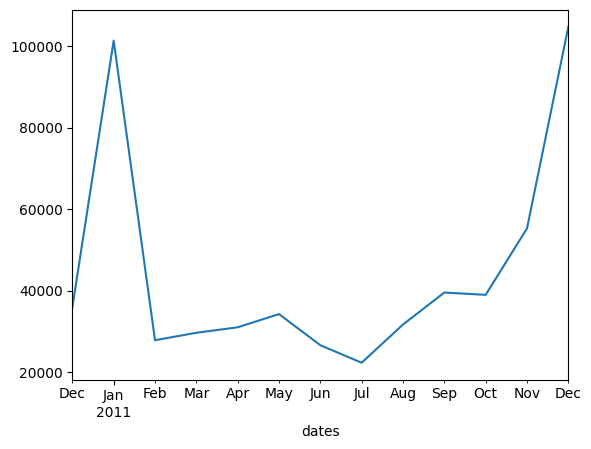

In [16]:
date_quantity = date_quantity.fillna(date_quantity.bfill())
date_quantity = date_quantity['quantity'].resample('MS').mean()
print(date_quantity)
date_quantity.plot()
plt.show()

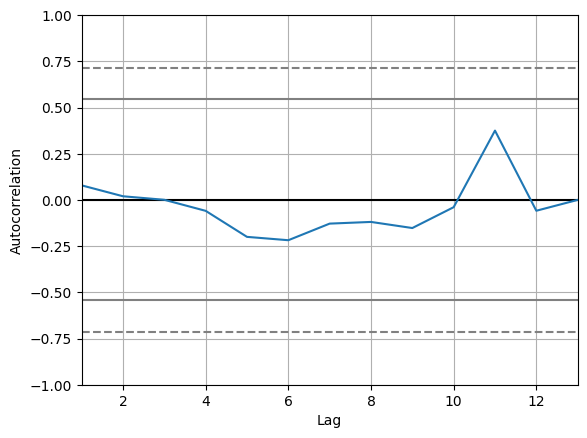

In [17]:
autocorrelation_plot(date_quantity)
plt.show()


In [43]:

quantity = date_quantity.values

size = int(len(quantity) * 0.66)
train, test = quantity[0:size], quantity[size:len(quantity)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2 ,2 ,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output
    predictions.append(yhat[0])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

pred = np.array(predictions)

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % (error/1000000))

<ipython-input-43-8ec35694aba5>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=25313.644899, expected=31742.000000
predicted=28038.534928, expected=39580.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41021.907414, expected=39018.000000
predicted=46152.920998, expected=55317.000000
predicted=61970.517970, expected=104795.000000
Test MSE: 419.292


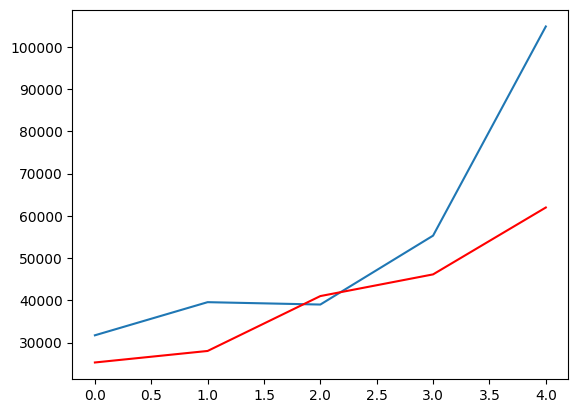

In [44]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
